# ZYG Machine Learning Module

In [1]:
# Homebrew
import zyg

In [2]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import planar_utils

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

(2, 400)
(1, 400)


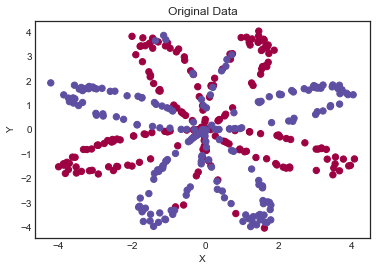

In [3]:
from importlib import reload
planar_utils = reload(planar_utils)

x, y = planar_utils.load_planar_dataset()
n_x = x.shape[0]
m = x.shape[1]

print (x.shape)
print (y.shape)

plt.scatter(x[0, :], x[1, :], c=y[0, :], s=40, cmap=plt.cm.Spectral)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
m_train = int(m * 0.75)
x_train = x[:, 0:m_train]
y_train = y[:, 0:m_train]
x_test  = x[:, m_train:]
y_test  = y[:, m_train:]

In [5]:
from importlib import reload
zyg = reload(zyg)

A = np.array([-1, 0, 1])
print (A)
zyg.Activation.sigmoid(A, True, {'leak':0.01, 'beta':0.1})

[-1  0  1]


array([0.19661193, 0.25      , 0.19661193])

In [20]:
from importlib import reload
zyg = reload(zyg)

#X_assess, Y_assess = nn_model_test_case()
#x = X_assess
#y = Y_assess

model = zyg.Model(x.shape[0])
#model.layer(12, activation='relu')
model.layer(1000, activation='tanh')
model.layer(1, activation='sigmoid')


model.fit(x, y, 
          verbose=True, compute_cost_every=1000, 
          learning_rate=1.2, iterations=8000, 
          random_init=True, random_scale=0.01
         )

x_test = x
y_test = y
y_hat = model.predict(x_test)
print ('Accuracy: %d' % float((np.dot(y_test, y_hat.T) + np.dot(1-y_test,1-y_hat.T))/float(y_test.size)*100) + '%')

Cost after 0 iterations: 0.6933038791591877
Cost after 1000 iterations: 0.28082342034921637
Cost after 2000 iterations: 0.2240514284937058
Cost after 3000 iterations: 0.2045914827688702
Cost after 4000 iterations: 0.17634607321821544
Cost after 5000 iterations: 0.17456469816115194
Cost after 6000 iterations: 0.16889250164291186
Cost after 7000 iterations: 0.16649885375945164
Cost after 7999 iterations: 0.16430211571162937
Accuracy: 88%


In [ ]:
from importlib import reload
planar_utils = reload(planar_utils)

planar_utils.plot_decision_boundary(lambda x: model.predict(x.T), x, y)
plt.title('Prediction')